In [383]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import datetime

In [2]:
# Read 'twitter-archive-enhanced.csv' file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
# Read 'image_predictions.tsv' file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_pred_df = pd.read_csv('image_predictions.tsv', sep="\t")

In [3]:
tweet_ids = archive_df.tweet_id.values
bearer_token = 'AAAAAAAAAAAAAAAAAAAAABLUfQEAAAAAQRO%2FraycGcqutR9ns9t1kuSoAVw%3DYFQsZ7An7FkiuH2J5poJdsfgU4goPoOcEn1eWKvFXrDYlT6fAb'

#initialize .Client()
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

tweet_fields = ["id", "public_metrics"]
count = 0
tweet_data = {}
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    outfile.write("tweet_id,like_count,retweet_count\n")
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = client.get_tweet(id = tweet_id, tweet_fields = tweet_fields)
            if tweet.data.get('public_metrics'):
                print("Sucess")
                outfile.write(f"{tweet_id},{tweet.data['public_metrics']['like_count']},{tweet.data['public_metrics']['retweet_count']}\n")
            else:
                print("Sucess-Null")
                outfile.write(f"{tweet_id}")
        except:
            print("Fail")
            fails_dict[count] = tweet_id
            pass

end = timer()
print("time: ", end-start)
print(fails_dict)

1: 892420643555336193
Sucess
2: 892177421306343426
Sucess
3: 891815181378084864
Sucess
4: 891689557279858688
Sucess
5: 891327558926688256
Sucess
6: 891087950875897856
Sucess
7: 890971913173991426
Sucess
8: 890729181411237888
Sucess
9: 890609185150312448
Sucess
10: 890240255349198849
Sucess
11: 890006608113172480
Sucess
12: 889880896479866881
Sucess
13: 889665388333682689
Sucess
14: 889638837579907072
Sucess
15: 889531135344209921
Sucess
16: 889278841981685760
Sucess
17: 888917238123831296
Sucess
18: 888804989199671297
Sucess
19: 888554962724278272
Sucess
20: 888202515573088257
Fail
21: 888078434458587136
Sucess
22: 887705289381826560
Sucess
23: 887517139158093824
Sucess
24: 887473957103951883
Sucess
25: 887343217045368832
Sucess
26: 887101392804085760
Sucess
27: 886983233522544640
Sucess
28: 886736880519319552
Sucess
29: 886680336477933568
Sucess
30: 886366144734445568
Sucess
31: 886267009285017600
Sucess
32: 886258384151887873
Sucess
33: 886054160059072513
Sucess
34: 88598480001994752

Sucess
270: 841320156043304961
Sucess
271: 841314665196081154
Sucess
272: 841077006473256960
Sucess
273: 840761248237133825
Sucess
274: 840728873075638272
Sucess
275: 840698636975636481
Sucess
276: 840696689258311684
Sucess
277: 840632337062862849
Sucess
278: 840370681858686976
Sucess
279: 840268004936019968
Sucess
280: 839990271299457024
Sucess
281: 839549326359670784
Sucess
282: 839290600511926273
Sucess
283: 839239871831150596
Sucess
284: 838952994649550848
Sucess
285: 838921590096166913
Sucess
286: 838916489579200512
Sucess
287: 838831947270979586
Sucess
288: 838561493054533637
Sucess
289: 838476387338051585
Sucess
290: 838201503651401729
Sucess
291: 838150277551247360
Sucess
292: 838085839343206401
Sucess
293: 838083903487373313
Sucess
294: 837820167694528512
Sucess
295: 837482249356513284
Sucess
296: 837471256429613056
Sucess
297: 837366284874571778
Fail
298: 837110210464448512
Sucess
299: 837012587749474308
Fail
300: 836989968035819520


Rate limit exceeded. Sleeping for 808 seconds.


Sucess
301: 836753516572119041
Sucess
302: 836677758902222849
Sucess
303: 836648853927522308
Sucess
304: 836397794269200385
Sucess
305: 836380477523124226
Sucess
306: 836260088725786625
Sucess
307: 836001077879255040
Sucess
308: 835685285446955009
Sucess
309: 835574547218894849
Sucess
310: 835536468978302976
Sucess
311: 835309094223372289
Sucess
312: 835297930240217089
Sucess
313: 835264098648616962
Sucess
314: 835246439529840640
Sucess
315: 835172783151792128
Sucess
316: 835152434251116546
Sucess
317: 834931633769889797
Sucess
318: 834786237630337024
Sucess
319: 834574053763584002
Sucess
320: 834477809192075265
Sucess
321: 834458053273591808
Sucess
322: 834209720923721728
Sucess
323: 834167344700198914
Sucess
324: 834089966724603904
Sucess
325: 834086379323871233
Sucess
326: 833863086058651648
Sucess
327: 833826103416520705
Sucess
328: 833732339549220864
Sucess
329: 833722901757046785
Sucess
330: 833479644947025920
Sucess
331: 833124694597443584
Sucess
332: 832998151111966721
Sucess
3

Sucess
566: 802265048156610565
Sucess
567: 802247111496568832
Fail
568: 802239329049477120
Sucess
569: 802185808107208704
Sucess
570: 801958328846974976
Sucess
571: 801854953262350336
Sucess
572: 801538201127157760
Sucess
573: 801285448605831168
Sucess
574: 801167903437357056
Sucess
575: 801127390143516673
Sucess
576: 801115127852503040
Sucess
577: 800859414831898624
Sucess
578: 800855607700029440
Sucess
579: 800751577355128832
Sucess
580: 800513324630806528
Sucess
581: 800459316964663297
Sucess
582: 800443802682937345
Sucess
583: 800388270626521089
Sucess
584: 800188575492947969
Sucess
585: 800141422401830912
Sucess
586: 800018252395122689
Sucess
587: 799774291445383169
Sucess
588: 799757965289017345
Sucess
589: 799422933579902976
Sucess
590: 799308762079035393
Sucess
591: 799297110730567681
Sucess
592: 799063482566066176
Sucess
593: 798933969379225600
Sucess
594: 798925684722855936
Sucess
595: 798705661114773508
Sucess
596: 798701998996647937
Sucess
597: 798697898615730177
Sucess
598

Rate limit exceeded. Sleeping for 799 seconds.


Sucess
601: 798673117451325440
Sucess
602: 798665375516884993
Sucess
603: 798644042770751489
Sucess
604: 798628517273620480
Sucess
605: 798585098161549313
Sucess
606: 798576900688019456
Sucess
607: 798340744599797760
Sucess
608: 798209839306514432
Sucess
609: 797971864723324932
Sucess
610: 797545162159308800
Sucess
611: 797236660651966464
Sucess
612: 797165961484890113
Sucess
613: 796904159865868288
Sucess
614: 796865951799083009
Sucess
615: 796759840936919040
Sucess
616: 796563435802726400
Sucess
617: 796484825502875648
Sucess
618: 796387464403357696
Sucess
619: 796177847564038144
Sucess
620: 796149749086875649
Sucess
621: 796125600683540480
Sucess
622: 796116448414461957
Sucess
623: 796080075804475393
Sucess
624: 796031486298386433
Sucess
625: 795464331001561088
Sucess
626: 795400264262053889
Sucess
627: 795076730285391872
Sucess
628: 794983741416415232
Sucess
629: 794926597468000259
Sucess
630: 794355576146903043
Sucess
631: 794332329137291264
Sucess
632: 794205286408003585
Sucess
6

Sucess
866: 762316489655476224
Sucess
867: 762035686371364864
Sucess
868: 761976711479193600
Sucess
869: 761750502866649088
Sucess
870: 761745352076779520
Sucess
871: 761672994376806400
Sucess
872: 761599872357261312
Sucess
873: 761371037149827077
Sucess
874: 761334018830917632
Sucess
875: 761292947749015552
Sucess
876: 761227390836215808
Sucess
877: 761004547850530816
Sucess
878: 760893934457552897
Sucess
879: 760656994973933572
Sucess
880: 760641137271070720
Sucess
881: 760539183865880579
Sucess
882: 760521673607086080
Sucess
883: 760290219849637889
Sucess
884: 760252756032651264
Sucess
885: 760190180481531904
Sucess
886: 760153949710192640
Sucess
887: 759943073749200896
Sucess
888: 759923798737051648
Fail
889: 759846353224826880
Sucess
890: 759793422261743616
Sucess
891: 759566828574212096
Fail
892: 759557299618865152
Sucess
893: 759447681597108224
Sucess
894: 759446261539934208
Sucess
895: 759197388317847553
Sucess
896: 759159934323924993
Sucess
897: 759099523532779520
Sucess
898: 

Rate limit exceeded. Sleeping for 790 seconds.


Sucess
902: 758474966123810816
Sucess
903: 758467244762497024
Sucess
904: 758405701903519748
Sucess
905: 758355060040593408
Sucess
906: 758099635764359168
Sucess
907: 758041019896193024
Sucess
908: 757741869644341248
Sucess
909: 757729163776290825
Sucess
910: 757725642876129280
Sucess
911: 757611664640446465
Sucess
912: 757597904299253760
Sucess
913: 757596066325864448
Sucess
914: 757400162377592832
Sucess
915: 757393109802180609
Sucess
916: 757354760399941633
Sucess
917: 756998049151549440
Sucess
918: 756939218950160384
Sucess
919: 756651752796094464
Sucess
920: 756526248105566208
Sucess
921: 756303284449767430
Sucess
922: 756288534030475264
Sucess
923: 756275833623502848
Sucess
924: 755955933503782912
Sucess
925: 755206590534418437
Sucess
926: 755110668769038337
Sucess
927: 754874841593970688
Sucess
928: 754856583969079297
Sucess
929: 754747087846248448
Sucess
930: 754482103782404096
Sucess
931: 754449512966619136
Sucess
932: 754120377874386944
Sucess
933: 754011816964026368
Fail
934

Sucess
1162: 723912936180330496
Sucess
1163: 723688335806480385
Sucess
1164: 723673163800948736
Sucess
1165: 723179728551723008
Sucess
1166: 722974582966214656
Sucess
1167: 722613351520608256
Sucess
1168: 721503162398597120
Sucess
1169: 721001180231503872
Sucess
1170: 720785406564900865
Sucess
1171: 720775346191278080
Sucess
1172: 720415127506415616
Sucess
1173: 720389942216527872
Sucess
1174: 720340705894408192
Sucess
1175: 720059472081784833
Sucess
1176: 720043174954147842
Sucess
1177: 719991154352222208
Sucess
1178: 719704490224398336
Sucess
1179: 719551379208073216
Sucess
1180: 719367763014393856
Sucess
1181: 719339463458033665
Sucess
1182: 719332531645071360
Sucess
1183: 718971898235854848
Sucess
1184: 718939241951195136
Sucess
1185: 718631497683582976
Sucess
1186: 718613305783398402
Sucess
1187: 718540630683709445
Sucess
1188: 718460005985447936
Sucess
1189: 718454725339934721
Sucess
1190: 718246886998687744
Sucess
1191: 718234618122661888
Sucess
1192: 717841801130979328
Sucess
1

Rate limit exceeded. Sleeping for 814 seconds.


Sucess
1201: 716730379797970944
Sucess
1202: 716447146686459905
Sucess
1203: 716439118184652801
Sucess
1204: 716285507865542656
Sucess
1205: 716080869887381504
Sucess
1206: 715928423106027520
Sucess
1207: 715758151270801409
Sucess
1208: 715733265223708672
Sucess
1209: 715704790270025728
Sucess
1210: 715696743237730304
Sucess
1211: 715680795826982913
Sucess
1212: 715360349751484417
Sucess
1213: 715342466308784130
Sucess
1214: 715220193576927233
Sucess
1215: 715200624753819648
Sucess
1216: 715009755312439296
Sucess
1217: 714982300363173890
Sucess
1218: 714962719905021952
Sucess
1219: 714957620017307648
Sucess
1220: 714631576617938945
Sucess
1221: 714606013974974464
Sucess
1222: 714485234495041536
Sucess
1223: 714258258790387713
Sucess
1224: 714251586676113411
Sucess
1225: 714214115368108032
Sucess
1226: 714141408463036416
Sucess
1227: 713919462244790272
Sucess
1228: 713909862279876608
Sucess
1229: 713900603437621249
Sucess
1230: 713761197720473600
Sucess
1231: 713411074226274305
Sucess
1

Sucess
1458: 695095422348574720
Sucess
1459: 695074328191332352
Sucess
1460: 695064344191721472
Sucess
1461: 695051054296211456
Sucess
1462: 694925794720792577
Sucess
1463: 694905863685980160
Sucess
1464: 694669722378485760
Sucess
1465: 694356675654983680
Sucess
1466: 694352839993344000
Sucess
1467: 694342028726001664
Sucess
1468: 694329668942569472
Sucess
1469: 694206574471057408
Sucess
1470: 694183373896572928
Sucess
1471: 694001791655137281
Sucess
1472: 693993230313091072
Sucess
1473: 693942351086120961
Sucess
1474: 693647888581312512
Sucess
1475: 693644216740769793
Sucess
1476: 693642232151285760
Sucess
1477: 693629975228977152
Sucess
1478: 693622659251335168
Sucess
1479: 693590843962331137
Sucess
1480: 693582294167244802
Sucess
1481: 693486665285931008
Sucess
1482: 693280720173801472
Sucess
1483: 693267061318012928
Sucess
1484: 693262851218264065
Sucess
1485: 693231807727280129
Sucess
1486: 693155686491000832
Sucess
1487: 693109034023534592
Sucess
1488: 693095443459342336
Sucess
1

Rate limit exceeded. Sleeping for 810 seconds.


Sucess
1502: 692142790915014657
Sucess
1503: 692041934689402880
Sucess
1504: 692017291282812928
Sucess
1505: 691820333922455552
Sucess
1506: 691793053716221953
Sucess
1507: 691756958957883396
Sucess
1508: 691675652215414786
Sucess
1509: 691483041324204033
Sucess
1510: 691459709405118465
Sucess
1511: 691444869282295808
Sucess
1512: 691416866452082688
Sucess
1513: 691321916024623104
Sucess
1514: 691096613310316544
Sucess
1515: 691090071332753408
Sucess
1516: 690989312272396288
Sucess
1517: 690959652130045952
Sucess
1518: 690938899477221376
Sucess
1519: 690932576555528194
Sucess
1520: 690735892932222976
Sucess
1521: 690728923253055490
Sucess
1522: 690690673629138944
Sucess
1523: 690649993829576704
Sucess
1524: 690607260360429569
Sucess
1525: 690597161306841088
Sucess
1526: 690400367696297985
Sucess
1527: 690374419777196032
Sucess
1528: 690360449368465409
Sucess
1529: 690348396616552449
Sucess
1530: 690248561355657216
Sucess
1531: 690021994562220032
Sucess
1532: 690015576308211712
Sucess
1

Sucess
1759: 678755239630127104
Sucess
1760: 678740035362037760
Sucess
1761: 678708137298427904
Sucess
1762: 678675843183484930
Sucess
1763: 678643457146150913
Sucess
1764: 678446151570427904
Sucess
1765: 678424312106393600
Sucess
1766: 678410210315247616
Sucess
1767: 678399652199309312
Sucess
1768: 678396796259975168
Sucess
1769: 678389028614488064
Sucess
1770: 678380236862578688
Sucess
1771: 678341075375947776
Sucess
1772: 678334497360859136
Sucess
1773: 678278586130948096
Sucess
1774: 678255464182861824
Sucess
1775: 678023323247357953
Sucess
1776: 678021115718029313
Sucess
1777: 677961670166224897
Sucess
1778: 677918531514703872
Sucess
1779: 677895101218201600
Sucess
1780: 677716515794329600
Sucess
1781: 677700003327029250
Sucess
1782: 677698403548192770
Sucess
1783: 677687604918272002
Sucess
1784: 677673981332312066
Sucess
1785: 677662372920729601
Sucess
1786: 677644091929329666
Sucess
1787: 677573743309385728
Sucess
1788: 677565715327688705
Sucess
1789: 677557565589463040
Sucess
1

Rate limit exceeded. Sleeping for 812 seconds.


Sucess
1801: 676975532580409345
Sucess
1802: 676957860086095872
Sucess
1803: 676949632774234114
Sucess
1804: 676948236477857792
Sucess
1805: 676946864479084545
Sucess
1806: 676942428000112642
Sucess
1807: 676936541936185344
Sucess
1808: 676916996760600576
Sucess
1809: 676897532954456065
Sucess
1810: 676864501615042560
Sucess
1811: 676821958043033607
Sucess
1812: 676819651066732545
Sucess
1813: 676811746707918848
Sucess
1814: 676776431406465024
Sucess
1815: 676617503762681856
Sucess
1816: 676613908052996102
Sucess
1817: 676606785097199616
Sucess
1818: 676603393314578432
Sucess
1819: 676593408224403456
Sucess
1820: 676590572941893632
Sucess
1821: 676588346097852417
Sucess
1822: 676582956622721024
Sucess
1823: 676575501977128964
Sucess
1824: 676533798876651520
Sucess
1825: 676496375194980353
Sucess
1826: 676470639084101634
Sucess
1827: 676440007570247681
Sucess
1828: 676430933382295552
Sucess
1829: 676263575653122048
Sucess
1830: 676237365392908289
Sucess
1831: 676219687039057920
Sucess
1

Sucess
2058: 671355857343524864
Sucess
2059: 671347597085433856
Sucess
2060: 671186162933985280
Sucess
2061: 671182547775299584
Sucess
2062: 671166507850801152
Sucess
2063: 671163268581498880
Sucess
2064: 671159727754231808
Sucess
2065: 671154572044468225
Sucess
2066: 671151324042559489
Sucess
2067: 671147085991960577
Sucess
2068: 671141549288370177
Sucess
2069: 671138694582165504
Sucess
2070: 671134062904504320
Sucess
2071: 671122204919246848
Sucess
2072: 671115716440031232
Sucess
2073: 671109016219725825
Sucess
2074: 670995969505435648
Sucess
2075: 670842764863651840
Sucess
2076: 670840546554966016
Sucess
2077: 670838202509447168
Sucess
2078: 670833812859932673
Sucess
2079: 670832455012716544
Sucess
2080: 670826280409919488
Sucess
2081: 670823764196741120
Sucess
2082: 670822709593571328
Sucess
2083: 670815497391357952
Sucess
2084: 670811965569282048
Sucess
2085: 670807719151067136
Sucess
2086: 670804601705242624
Sucess
2087: 670803562457407488
Sucess
2088: 670797304698376195
Sucess
2

Rate limit exceeded. Sleeping for 838 seconds.


Sucess
2101: 670704688707301377
Sucess
2102: 670691627984359425
Sucess
2103: 670679630144274432
Sucess
2104: 670676092097810432
Sucess
2105: 670668383499735048
Sucess
2106: 670474236058800128
Sucess
2107: 670468609693655041
Sucess
2108: 670465786746662913
Sucess
2109: 670452855871037440
Sucess
2110: 670449342516494336
Sucess
2111: 670444955656130560
Sucess
2112: 670442337873600512
Sucess
2113: 670435821946826752
Sucess
2114: 670434127938719744
Sucess
2115: 670433248821026816
Sucess
2116: 670428280563085312
Sucess
2117: 670427002554466305
Sucess
2118: 670421925039075328
Sucess
2119: 670420569653809152
Sucess
2120: 670417414769758208
Sucess
2121: 670411370698022913
Sucess
2122: 670408998013820928
Sucess
2123: 670403879788544000
Sucess
2124: 670385711116361728
Sucess
2125: 670374371102445568
Sucess
2126: 670361874861563904
Sucess
2127: 670338931251150849
Sucess
2128: 670319130621435904
Sucess
2129: 670303360680108032
Sucess
2130: 670290420111441920
Sucess
2131: 670093938074779648
Sucess
2

In [16]:
tweet_df = pd.read_csv('tweet_json.txt')

## Assessing Data

In [17]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
tweet_df

,tweet_id,like_count,retweet_count
0,892420643555336193,33738,6985
1,892177421306343426,29276,5288
2,891815181378084864,22012,3469
3,891689557279858688,36837,7203
4,891327558926688256,35214,7737
...,...,...,...
2322,666049248165822465,88,36
2323,666044226329800704,246,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


In [19]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   like_count     2327 non-null   int64
 2   retweet_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [22]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
archive_df.iloc[7, 9]

'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1'

In [52]:
archive_df[archive_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [57]:
tweet_df.describe()

,tweet_id,like_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7038.282768,2465.010314
std,6.820795e+16,10936.054633,4174.166446
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1223.000000,493.500000
50%,7.178418e+17,3044.000000,1148.000000
75%,7.986547e+17,8578.000000,2853.000000
max,8.924206e+17,144515.000000,70539.000000


In [58]:
archive_df.tweet_id.duplicated().sum()

0

In [59]:
tweet_df.tweet_id.duplicated().sum()

0

In [60]:
image_pred_df.tweet_id.duplicated().sum()

0

In [71]:
archive_df[archive_df.name == "a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [72]:
archive_df[archive_df.name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [73]:
archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Quality
- There are 2356 data for archive_df, 2327 data for tweet_df, and 2075 data for image_pred_df.
- Data type errors found in some columns in archive_df:'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp'. 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
- Among the data in the expanded_urls column of archive_df, some columns overlap the same data twice.
- Some rating_numerator and rating_denominator information in archive_df are incorrect. For example, a tweet marked 99/90 because nine dogs were included in the picture, or a tweet marked the date of 4/20.
- Null data in archive_df is represented as the string 'None' for some columns.
- Some data in the tweet_data show excessively little like_count or retweet_count.
- In archive_df data, the name appears to be set as "a" or "None" by default.
- The source column in archive_df is written in html format.
- archive_df data contains retweeted data also.

#### Tidiness
- In archive_df, rows from 'doggo' to 'puppo' represent one attribute related to the "stage" of the dog.
- Dataframes for photos and dogs can be created by combining 'name' to 'puppo' column and 'rating_numerator' in archive_df, and data in image_pred_df data. In addition, dataframes for tweets can be created by combining the remaining information of archive_df and the information in tweet_df.

## Cleaning Data

In [119]:
# Making a copy of the original data
archive_clean = archive_df.copy()
tweet_clean = tweet_df.copy()
image_clean = image_pred_df.copy()

### Tidiness

#### Dog Stage Related Columns

Define

- Generate a row of category type named 'dog_stage' by aggregating column information from doggo to puppo.

Code

In [120]:
doggo_idx = pd.melt(archive_clean, id_vars=['tweet_id'], value_vars=['doggo']).query('value == "doggo"').index
floofer_idx = pd.melt(archive_clean, id_vars=['tweet_id'], value_vars=['floofer']).query('value == "floofer"').index
pupper_idx = pd.melt(archive_clean, id_vars=['tweet_id'], value_vars=['pupper']).query('value == "pupper"').index
puppo_idx = pd.melt(archive_clean, id_vars=['tweet_id'], value_vars=['puppo']).query('value == "puppo"').index

# Generate New column
archive_clean.loc[np.array(doggo_idx), 'dog_stage'] = "doggo"
archive_clean.loc[np.array(floofer_idx), 'dog_stage'] = "floofer"
archive_clean.loc[np.array(pupper_idx), 'dog_stage'] = "pupper"
archive_clean.loc[np.array(puppo_idx), 'dog_stage'] = "puppo"

# Modify Datatype of the new column
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

# Drop "doggo" to "puppo" columns
archive_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace=True)

Test

In [104]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,pupper
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013...,10,10,None,NaN
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,NaN
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723...,7,10,Bruce,NaN
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,NaN


In [121]:
archive_clean.dog_stage.unique()

[NaN, 'doggo', 'puppo', 'pupper', 'floofer']
Categories (4, object): ['doggo', 'floofer', 'pupper', 'puppo']

In [122]:
archive_clean.dtypes

tweet_id                         int64
in_reply_to_status_id          float64
in_reply_to_user_id            float64
timestamp                       object
source                          object
text                            object
retweeted_status_id            float64
retweeted_status_user_id       float64
retweeted_status_timestamp      object
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
dog_stage                     category
dtype: object

#### Data on images / Data on tweets

Define

- Combine the data up to expanded_url column of archive_clean with tweet_clean data to generate a tweet_info_clean dataframe.
- Combine the archive clean from rating to dog_stage data and image_clean data to generate an image_info_clean dataframe.

In [128]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


Code

In [138]:
tweet_info_clean = pd.merge(archive_clean.loc[:, 'tweet_id':'expanded_urls'], tweet_clean,
                           how = "outer", on = "tweet_id")
image_info_clean = pd.merge(archive_clean.loc[:, np.array(['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage'])]
                            , image_clean, how = "right", on = "tweet_id")

Test

In [141]:
tweet_info_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,like_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,33738.0,6985.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,29276.0,5288.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,22012.0,3469.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,36837.0,7203.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,35214.0,7737.0


In [140]:
image_info_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,8,10,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [139]:
image_info_clean.jpg_url.isnull().sum()

0

### Quality

#### Mismatch in number of data

Define

- Leave only corresponding tweet_info_clean data based on the tweet_id column of image_info_clean dataframe.

Code

In [143]:
tweet_info_clean = pd.merge(image_info_clean.loc[:, 'tweet_id'], tweet_info_clean
                           , how = "left", on = ['tweet_id'])

Test

In [144]:
tweet_info_clean.shape

(2075, 12)

In [145]:
image_info_clean.shape

(2075, 16)

#### Data type error

Define

- Modify data types in the following columns using the astype and to_datetime functions: 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp'. 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

Code

In [215]:
# Change data types of id related columns to int
tweet_info_clean.loc[:, np.array(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'])] = tweet_info_clean.loc[:, np.array(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'])].astype('Int64')

# Change data types of counted values to int
tweet_info_clean.loc[:, np.array(['like_count', 'retweet_count'])] = tweet_info_clean.loc[:, np.array(['like_count', 'retweet_count'])].astype('Int64')

# Change data types of timestamp related columns to datetime
def dt_func(x):
    try:
        return pd.to_datetime(x)
    except:
        return pd.NaT

tweet_info_clean.timestamp = tweet_info_clean.timestamp.apply(dt_func)
tweet_info_clean.retweeted_status_timestamp = tweet_info_clean.retweeted_status_timestamp.apply(dt_func)

Test

In [216]:
tweet_info_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                       Int64
in_reply_to_user_id                         Int64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                         Int64
retweeted_status_user_id                    Int64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
like_count                                  Int64
retweet_count                               Int64
dtype: object

#### Duplicate url of expanding_urls column

Define

- Split url based on commas for rows containing commas.
- Remove duplicate urls and reassign.

Code

In [235]:
tweet_info_clean['expanded_urls'] = tweet_info_clean['expanded_urls'].apply(lambda x: ', '.join(set([y.strip() for y in x.split(',')])))

Test

In [234]:
# Before Cleaning
tweet_info_clean.iloc[94,:].expanded_urls

'https://twitter.com/dogratingrating/status/667548415174144001/photo/1,https://twitter.com/dogratingrating/status/667548415174144001/photo/1'

In [236]:
# After Cleaning
tweet_info_clean.iloc[94,:].expanded_urls

'https://twitter.com/dogratingrating/status/667548415174144001/photo/1'

#### Invalid rating value

Define

- Check the appropriate tweets and fill in the appropriate information.
- If it is unable to determine the appropriate information, drop the corresponding row.

Code

In [238]:
image_info_clean[image_info_clean.rating_denominator != 10]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
20,666287406224695296,1,2,an,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
501,675853064436391936,88,80,None,NaN,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
560,677716515794329600,144,120,None,NaN,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
667,682962037429899265,7,11,Darrel,NaN,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
692,684222868335505415,121,110,None,NaN,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
693,684225744407494656,143,130,None,NaN,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True
865,697463031882764288,44,40,None,NaN,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
941,704054845121142784,60,50,a,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1007,709198395643068416,45,50,None,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1025,710658690886586372,80,80,None,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True


In [239]:
# Modify to the appropriate information
modify_index = image_info_clean[image_info_clean.rating_denominator != 10].index
new_info = [(9, 10), (11, 10), (12, 10), (10, 10), (11, 10), (11, 10), (11, 10)
           , (12, 10), (9, 10), (10, 10), (11, 10), (11, 10), (13, 10), (12, 10)
           , (14, 10), (11, 10), (0, 0), (12, 10)]
count = 0

for i, v in new_info:
    idx = modify_index[count]
    count += 1
    image_info_clean.loc[idx, "rating_numerator"] = i
    image_info_clean.loc[idx, "rating_denominator"] = v
    
# Drop non-rated tweet
image_info_clean.drop(index=1658, inplace=True)
tweet_info_clean.drop(index=tweet_info_clean[tweet_info_clean['tweet_id']==810984652412424192].index
                     , inplace=True)

Test

In [240]:
image_info_clean[image_info_clean.rating_denominator != 10]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Null data marked 'None'

Define

- Replace Null data marked 'None' to pd.NaN.

Code

In [263]:
new_name_col = image_info_clean[image_info_clean.name != "None"].name
image_info_clean.drop(columns=['name'], inplace=True)
image_info_clean['name'] = new_name_col

Test

In [264]:
image_info_clean.name

0            NaN
1              a
2              a
3              a
4            NaN
          ...   
2070    Franklin
2071       Darla
2072      Archie
2073       Tilly
2074     Phineas
Name: name, Length: 2074, dtype: object

#### Default value for name

Define

- Reallocate to NaN value for data in column 'name' set to default value of "a".

Code

In [272]:
new_name_col = image_info_clean[image_info_clean.name != "a"].name
image_info_clean.drop(columns=['name'], inplace=True)
image_info_clean['name'] = new_name_col

Test

In [273]:
image_info_clean.name

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2070    Franklin
2071       Darla
2072      Archie
2073       Tilly
2074     Phineas
Name: name, Length: 2074, dtype: object

#### Html format of source data

Define

- Extract and reassign on ly content from source data written in html format.

Code

In [297]:
# Extract only content in source column
tweet_info_clean.source = tweet_info_clean.source.str.split(">", expand=True).iloc[:,1].str[:-3]

Test

In [299]:
tweet_info_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

#### Retweeted Data

Define

- Check the retweeted data and drop the corresponding row.
- Drop the column related to the retweeted id, etc.

Code

In [304]:
tweet_info_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'like_count',
       'retweet_count'],
      dtype='object')

In [306]:
drop_idx = tweet_info_clean[tweet_info_clean.retweeted_status_id.notna()].index
drop_col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweet_info_clean.drop(index=drop_idx, columns=drop_col, inplace=True)

Test

In [307]:
tweet_info_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,like_count,retweet_count
0,666020888022790149,<NA>,<NA>,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,2286,422
1,666029285002620928,<NA>,<NA>,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,112,39
2,666033412701032449,<NA>,<NA>,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,100,36
3,666044226329800704,<NA>,<NA>,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,246,115
4,666049248165822465,<NA>,<NA>,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,88,36


## Storing Data

In [309]:
# Storing tweet_info_clean dataframe
tweet_info_clean.to_csv('twitter_archive_master.csv', index=False)
# Storing image_info_clean dataframe
image_info_clean.to_csv('image_master.csv', index=False)

## Analyzing and Visualizing Data

Based on the Analysis, I would like to gain insight into the following three questions.
- Prediction: What is the accuracy of determining that the picture is 'dog'?
- Dog Stage: How does the number of rating, like and retweets vary depending on the stage of the dog?
- Account: How has the number of likes and retweets in an account changed over time?

#### Prediction

In [326]:
p1_accuracy = image_info_clean.query('p1_dog == True').count().tweet_id/image_info_clean.count().tweet_id
p1_accuracy

0.7381870781099324

In [327]:
p2_accuracy = image_info_clean.query('(p1_dog == True) or (p2_dog == True)').count().tweet_id / image_info_clean.count().tweet_id
p2_accuracy

0.8129218900675024

In [328]:
p3_accuracy = image_info_clean.query('(p1_dog == True) or (p2_dog == True) or (p3_dog == True)').count().tweet_id / image_info_clean.count().tweet_id
p3_accuracy

0.8437801350048216

 The accuracy of determining 'dog' by looking at the picture was found to be 73.8% accuracy up to the first prediction, 81.3% accuracy up to the second prediction, and 84.4% accuracy up to the third prediction.
 
 As the number of predictions increased, there was no tendency for accuracy to increase in a rapid way, so it can be inferred that the effect of the number of predictions on the accuracy of predictions was small.

#### Dog Stage

In [334]:
image_info_clean.groupby('dog_stage').mean().loc[:, 'rating_numerator']

dog_stage
doggo      11.970149
floofer    11.875000
pupper     10.779279
puppo      12.041667
Name: rating_numerator, dtype: float64

In [343]:
like_retweet = tweet_info_clean.loc[:, np.array(['tweet_id', 'like_count', 'retweet_count'])]
stage_rating = image_info_clean.loc[:, np.array(['tweet_id', 'dog_stage', 'rating_numerator'])]
rating_like_retweet = pd.merge(stage_rating, like_retweet, how="outer", on="tweet_id")
dogstage_rate = rating_like_retweet.groupby('dog_stage').mean().iloc[:, 1:]

In [344]:
dogstage_rate

,rating_numerator,like_count,retweet_count
dog_stage,,,
doggo,11.970149,17560.483871,5959.258065
floofer,11.875000,11651.75,3823.25
pupper,10.779279,6438.646226,1970.419811
puppo,12.041667,20500.565217,5784.0


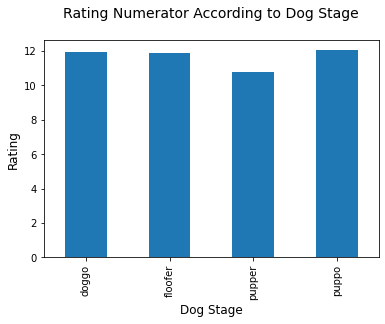

In [351]:
import matplotlib.pyplot as plt
%matplotlib inline
dogstage_rate.rating_numerator.plot(kind="bar")
plt.title("Rating Numerator According to Dog Stage\n", fontsize=14)
plt.xlabel("Dog Stage", fontsize=12)
plt.ylabel("Rating", fontsize=12);

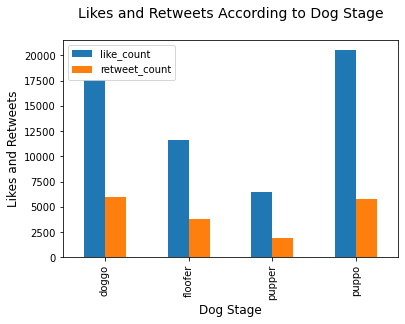

In [352]:
dogstage_rate.iloc[:,1:].plot(kind="bar")
plt.title("Likes and Retweets According to Dog Stage\n", fontsize=14)
plt.xlabel("Dog Stage", fontsize=12)
plt.ylabel("Likes and Retweets", fontsize=12)
plt.legend();

 When checking the tendency using the graph, the result of scoring shows that the pupper scored lower than the other three stages, and the tendency of like and retweet also shows that the pupper has a low preference and doggo and puppo have a high preference.
 
 To reconfirm the figures through the table, it can be seen that doggo and puppo generally receive high scores, likes, and retweets, and puppo seems to be approximately ahead. In addition, it can be confirmed once again that the preference of pupper is generally low compared to other stages.

#### Accout

In [405]:
time_like_retweet = tweet_info_clean.loc[:, np.array(['timestamp', 'like_count', 'retweet_count'])]
time_like_retweet.timestamp = time_like_retweet.timestamp.apply(lambda x: x.replace(day=1))
time_like_retweet['date'] = time_like_retweet.timestamp.dt.date
time_like_retweet = time_like_retweet.groupby('date').sum()

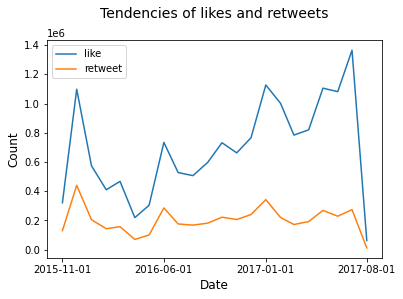

In [411]:
time_like_retweet.plot()
plt.title("Tendencies of likes and retweets\n", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(np.array(['2015-11', '2016-06', '2017-01', '2017-08']))
plt.legend(['like', 'retweet']);

 When looking at the overall trend, it can be seen that the number of retweets remains similar until 2017, except for the peak of likes and retweets in early 2015. However, in the case of the number of likes, it can be seen that it has been continuously rising since it hit its lowest point in early 2016.